#### 최종적 실습을 위한 이미지 로드

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

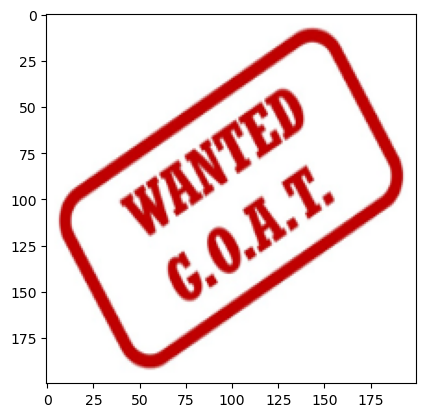

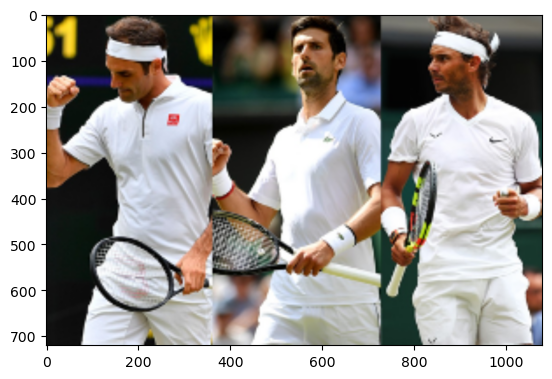

In [16]:
sample_img = cv2.imread('../99_Studyfile/02_Sample/ex_image.png')
sample_logo = cv2.imread('../99_Studyfile/02_Sample/ex_image_logo.png')

img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
watermark = cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

# watermark resize as 200x200
small_img = cv2.resize(watermark, (200,200))

# player img reszze as 1080X720
resize_img = cv2.resize(img,(1080,720))

plt.imshow(small_img)
plt.show()

plt.imshow(resize_img)
plt.show()

img size >>  200 200


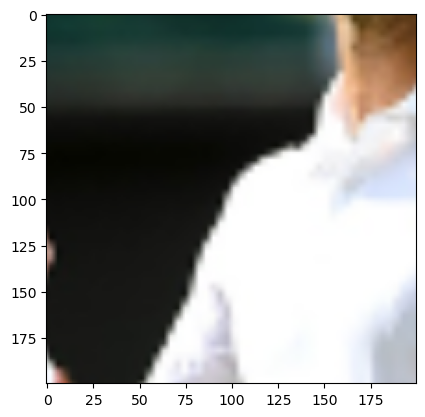

In [17]:
# img spec loading
height, width, _ = small_img.shape
print('img size >> ', height, width)

x_offset = 400
y_offset = 170

# roi : resion of interest
roi = resize_img[y_offset:470,x_offset:700]
roi=resize_img[y_offset:height+y_offset, x_offset:width+x_offset]
plt.imshow(roi)
plt.show()

#### logo image to gray scale

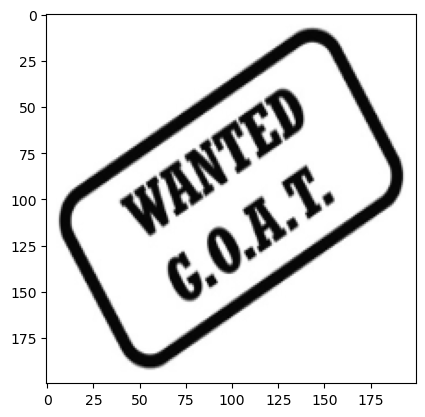

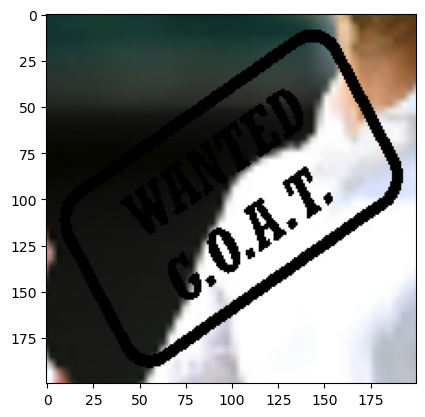

In [18]:
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_RGB2GRAY)

ret, mask = cv2.threshold(small_img_gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(small_img_gray, 'gray')
plt.show()

# cv2.bitwise_or 매개변수로 roi와 마스크를 연산자에 전달
bg = cv2.bitwise_or(roi,roi,mask = mask)
plt.imshow(bg)
plt.show()

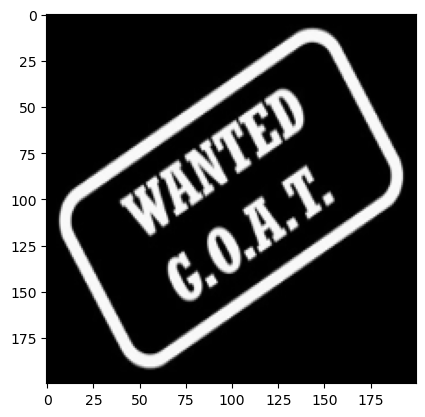

In [19]:
mask_inv = cv2.bitwise_not(small_img_gray)

plt.imshow(mask_inv, 'gray')
plt.show()


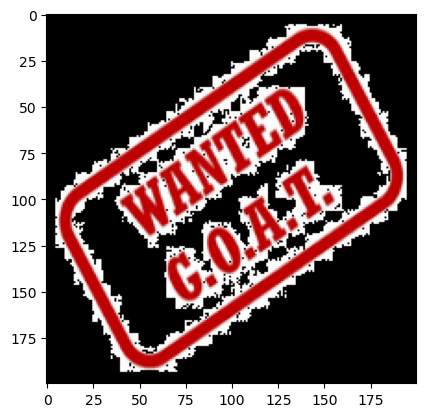

In [20]:
fg = cv2.bitwise_and(small_img,small_img, mask=mask_inv)
plt.imshow(fg)
plt.show()

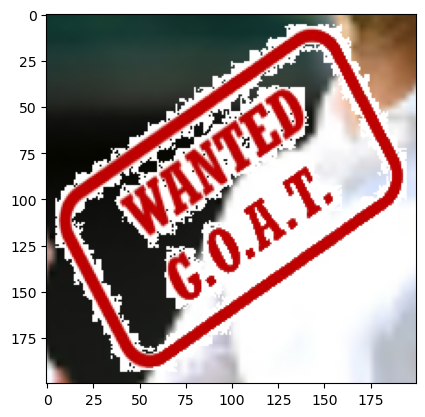

In [21]:
final_roi = cv2.add(bg,fg)
plt.imshow(final_roi)
plt.show()

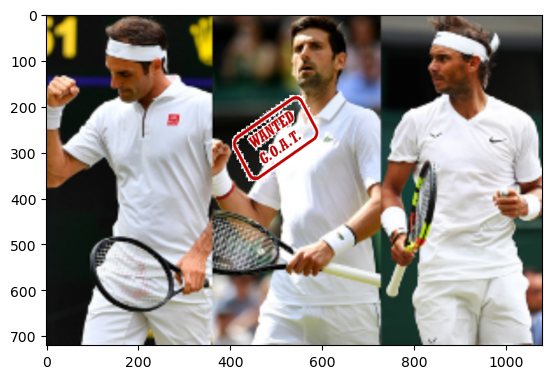

In [23]:
small_img = final_roi
resize_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(resize_img)
plt.show()